# Exercise #3
## Penny
In this assignment, you'll exercise your SQL query skills.

The scenario
In the year 20XX, I have won the lottery and decided to leave my programming days behind me in order to pursue my true calling as a cat café tycoon. I've stored information about my cats and cafés in this SQLite database, which you should download and put in the same directory as this file.

The following cell loads the JupySQL extension and the cat cafés database:


In [19]:
%load_ext sql
%sql sqlite:///catcafes.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Because I'm focused on taking care of cats and scouting out new café locations, I need some help querying the database. And that's what you're going to do in this notebook! Let's take a look at the structure of the database.

There are three tables:

In [20]:
%sqlcmd tables

Name
cafe
cat
cat_cafe


The `cafe` table lists all of the cafés in my growing cat café empire. Each café has a name, a ZIP code, and a unique ID number:

In [21]:
%sqlcmd columns -t cafe

name,type,nullable,default,primary_key
id,INTEGER,True,None,1
name,VARCHAR(40),True,None,0
zipcode,VARCHAR(5),True,None,0


The `cat` table contains information about every cat who currently lives in one of my cafés. Each cat has a unique ID, a name, its weight in pounds, its fur color, and the pattern of the fur. If you're interested, [read more on the interesting topic of cat coat genetics](https://en.wikipedia.org/wiki/Cat_coat_genetics).

In [22]:
%sqlcmd columns -t cat

name,type,nullable,default,primary_key
id,INTEGER,True,None,1
name,VARCHAR(40),True,None,0
weight,"NUMERIC(10, 2)",True,None,0
color,VARCHAR(40),True,None,0
pattern,VARCHAR(40),True,None,0


Finally, there is a linking table called `cat_cafe` which associates cats to cafés. Each café has a number of cats, and some cats are moved regularly between locations. Thus there is a many-to-many relationship between cats and cafés. The `active` field indicates the cat's current location.

In [23]:
%sqlcmd columns -t cat_cafe

name,type,nullable,default,primary_key
cat_id,INTEGER,True,None,0
cafe_id,INTEGER,True,None,0
active,BOOLEAN,True,None,0


Thank you for helping out!

## Task 1: Columns and equals

Modify the query below so that the query returns the names of all tabby cats.

Expected output:

|    name   |
| --------- |
|  Georges  |
|  Scaredy  |
| Charlotte |
|   Minka   |
|   Carlos  |
|   Chanel  |
|    Jiji   |


In [24]:
%%sql
SELECT name
FROM cat
WHERE pattern = 'tabby'

Running query in 'sqlite:///catcafes.db'

name
Georges
Scaredy
Charlotte
Minka
Carlos
Chanel
Jiji


## Task 2: Order and limits

Modify the query below so that it returns the name and zipcode of the cafe whose name comes last in alphabetical order.

Expected output:

|    name    | zipcode |
|:----------:|:-------:|
| Tall Tails |  11222  |

In [25]:
%%sql
SELECT name, zipcode
FROM cafe
ORDER BY name DESC
LIMIT 1

Running query in 'sqlite:///catcafes.db'

name,zipcode
Tall Tails,11222


limit  = top row, which is the café name that comes last alphabetically.  
DESC= (Z to A)

## Task 3: Inequality expressions

Modify the query below so that it returns the names of all cats whose coloring is either white or black, and who weight more than 9 lbs, listed in alphabetical order by name.

Expected output:

|    name   |
| --------- |
|   Charly  |
|  Georges  |
|    Jack   |
|    Jiji   |
| Lafayette |
|    Mimi   |
| Sylvester |
|  Whiskers |


In [26]:
%%sql
SELECT name
FROM cat
WHERE ( color= 'white' or color='black') AND weight > 9
ORDER BY name ASC

Running query in 'sqlite:///catcafes.db'

name
Charly
Georges
Jack
Jiji
Lafayette
Mimi
Sylvester
Whiskers


## Task 4: Aggregation and grouping

Modify the SQL statement below so that it returns a list of cat colors along with the weight of the heaviest cat having that color. Only show colors whose heaviest cat weights more than 10.5 lbs.

Expected output:

|  color   | max(weight) |
| -------- | ----------- |
|  brown   |    10.88    |
| cinnamon |    11.37    |
|  lilac   |    10.76    |
|   red    |      12     |


In [27]:
%%sql
SELECT color, MAX(weight)
FROM cat
GROUP BY color
HAVING MAX(weight) > 10.5;

Running query in 'sqlite:///catcafes.db'

color,MAX(weight)
brown,10.88
cinnamon,11.37
lilac,10.76
red,12


## Task 5: Joins, part 1

Modify the query below so that it shows the name of every tortoiseshell cat along with the `id` field of the café where the cat can currently be found (i.e., the `active` field is true).

Expected output:

|    name   | cafe_id |
| --------- | ------- |
|    Luna   |    2    |
|   Angel   |    4    |
|   Moritz  |    2    |
|  O'Malley |    3    |
| Lafayette |    5    |

In [51]:
%%sql
SELECT DISTINCT color FROM cat;

Running query in 'sqlite:///catcafes.db'

color
black
cinnamon
brown
white
red
cream
lilac
blue
fawn


In [54]:
%%sql
SELECT DISTINCT pattern FROM cat;

Running query in 'sqlite:///catcafes.db'

pattern
colorpoint
solid
tortoiseshell
tabby
bicolor
calico


In [55]:
%%sql
SELECT DISTINCT cat.name, cat_cafe.cafe_id
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
WHERE cat.pattern = 'tortoiseshell' AND cat_cafe.active = true;

Running query in 'sqlite:///catcafes.db'

name,cafe_id
Luna,2
Angel,4
Moritz,2
O'Malley,3
Lafayette,5


## Task 6: Joins, part 2

The following query is just like the one above, except it shows the name of the café instead of its ID. Add the additional `JOIN` to make the query work.

Expected output:

|    name   |       name_1      |
| --------- | ----------------- |
|    Luna   | Independent Claws |
|   Angel   |     Tall Tails    |
|   Moritz  | Independent Claws |
|  O'Malley |   Paws and Play   |
| Lafayette |     Cats Meow     |

In [59]:
%%sql
SELECT cat.name, cafe.name
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.pattern = 'tortoiseshell' AND cat_cafe.active = true;

Running query in 'sqlite:///catcafes.db'

name,name_1
Luna,Independent Claws
Angel,Tall Tails
Moritz,Independent Claws
O'Malley,Paws and Play
Lafayette,Cats Meow


## Task 7: Joins with DISTINCT

Quick, I need to know which zip codes have lilac tabby cats! Fix the query below to give me this information.

Expected output:

| zipcode |
| ------- |
|  11215  |
|  11237  |

In [60]:
%%sql
SELECT DISTINCT cafe.zipcode
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.color = 'lilac' AND cat.pattern = 'tabby' AND cat_cafe.active = true;

Running query in 'sqlite:///catcafes.db'

zipcode
11215
11237


## Task 8 (advanced): Joins with aggregation

Okay, time to take off the training wheels. Modify the query below so that it returns the name of each café along with the average weight of all of the cats at that location.

Expected output:

|        name       |  avg(cat.weight)  |
| ----------------- | ----------------- |
|     Cats Meow     | 9.754999999999999 |
|   Hang In There   | 9.254285714285714 |
| Independent Claws | 9.334545454545456 |
|   Paws and Play   | 9.284545454545453 |
|     Tall Tails    | 9.817142857142857 |

In [63]:
%%sql
SELECT cafe.name, AVG(cat.weight)
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
GROUP BY cafe.name;

Running query in 'sqlite:///catcafes.db'

name,AVG(cat.weight)
Cats Meow,9.42909090909091
Hang In There,9.412
Independent Claws,9.40857142857143
Paws and Play,9.517333333333333
Tall Tails,9.50625


## Task 9 (advanced): Joins with order and limit

Write a query below that returns the name of the café with the most tortoiseshell cats, along with the number of tortoiseshell cats at that location.

Expected output:

|        name       | count(cat.name) |
| ----------------- | --------------- |
| Independent Claws |        2        |

* Join cat, cat_cafe, and cafe tables to get the relationship between cats and cafes.
* Filter for tortoiseshell cats
* Count the number of tortoiseshell cats per cafe.
* Order the results by the count.
* Limit to the top result.

In [68]:
%%sql
SELECT cafe.name, COUNT(cat.name) AS count
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.pattern = 'tortoiseshell'
GROUP BY cafe.name
ORDER BY count DESC
LIMIT 1;

Running query in 'sqlite:///catcafes.db'

name,count
Independent Claws,4


In [69]:
%%sql
SELECT cafe.name, cat.name
FROM cat
JOIN cat_cafe ON cat.id = cat_cafe.cat_id
JOIN cafe ON cat_cafe.cafe_id = cafe.id
WHERE cat.pattern = 'tortoiseshell';

Running query in 'sqlite:///catcafes.db'

name,name_1
Independent Claws,Luna
Tall Tails,Angel
Hang In There,Moritz
Independent Claws,Moritz
Paws and Play,O'Malley
Independent Claws,O'Malley
Tall Tails,O'Malley
Cats Meow,Lafayette
Independent Claws,Lafayette
Tall Tails,Lafayette


## Task 10 (advanced): Pandas integration

Write code in the cell below to show a histogram of cat weights with eight bins. Do this by assigning the result of the query to a variable and fetching the Pandas dataframe.

Expected output:

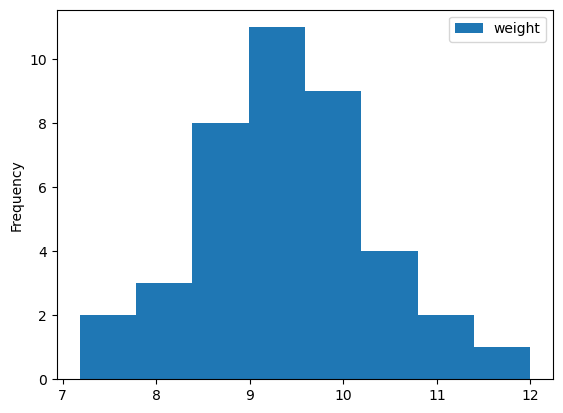

Running query in 'sqlite:///catcafes.db'

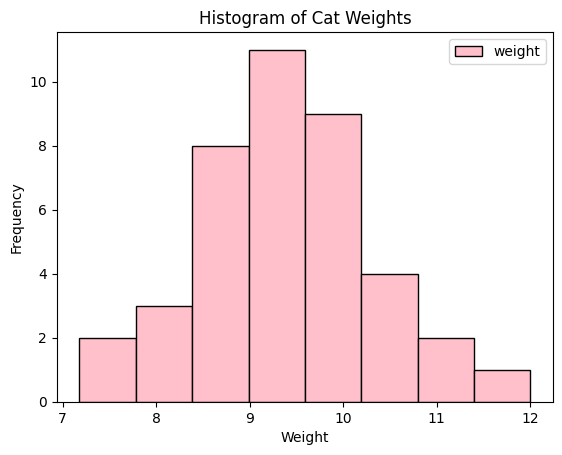

In [72]:
# Fetch data , use SQL
result = %sql SELECT weight FROM cat;

# Convert the SQL to a Pandas DataFrame
df = result.DataFrame()

# Plot histogram using Matplotlib
import matplotlib.pyplot as plt

plt.hist(df['weight'], bins=8, label='weight', color = 'pink' , edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Cat Weights')
plt.legend()
plt.show()


Great work! You're hired.